In [1]:
!pip install wordcloud

In [2]:
!pip install -U spacy

In [3]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [3]:
df=pd.read_csv('fake job detection.csv')

In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.shape

(17880, 18)

In [6]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
df=df.drop(['salary_range','has_questions','employment_type'],axis=1)


In [8]:
df.head()

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  required_experience  10830 non-null  object
 11  required_education   9775 non-null   object
 12  industry             12977 non-null  object
 13  function             11425 non-null  object
 14  fraudulent           17880 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 2.0+ MB


In [10]:
df.fillna('',inplace=True) #fill nan with blank

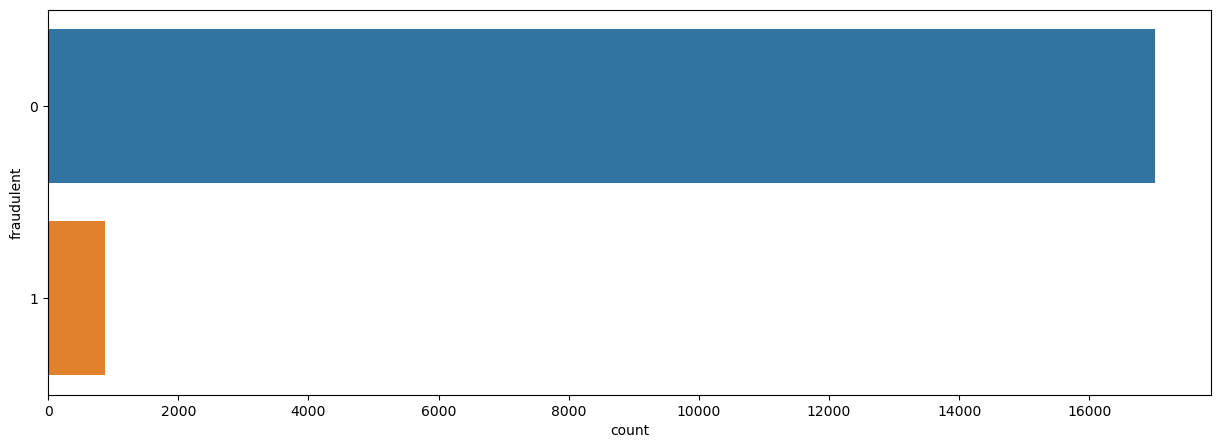

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=df)
plt.show()

In [12]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [13]:
#no of jobs posted and expected experience
exp=dict(df.required_experience.value_counts())#creates dict of experience and its count value
del exp['']

In [14]:
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

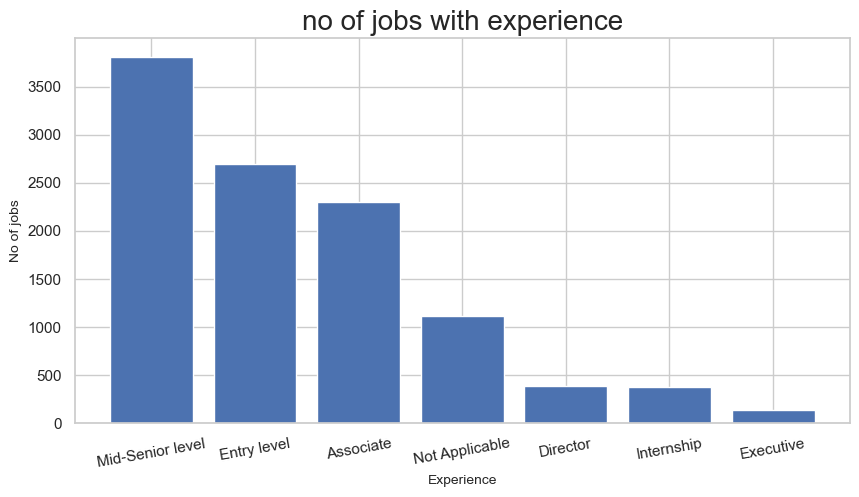

In [15]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(),exp.values())
plt.title("no of jobs with experience",size=20)
plt.xlabel("Experience",size=10)
plt.ylabel("No of jobs",size=10)
plt.xticks(rotation=10)
plt.show()

In [16]:
#spliting column location to get country name
def split(location):
    l=location.split(',')
    return l[0]#country is present at 1st position
df['country']=df.location.apply(split)

In [17]:
df.head()

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,Internship,,,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,,,,,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [18]:
countr=dict(df.country.value_counts()[:14])
del countr['']
countr

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80}

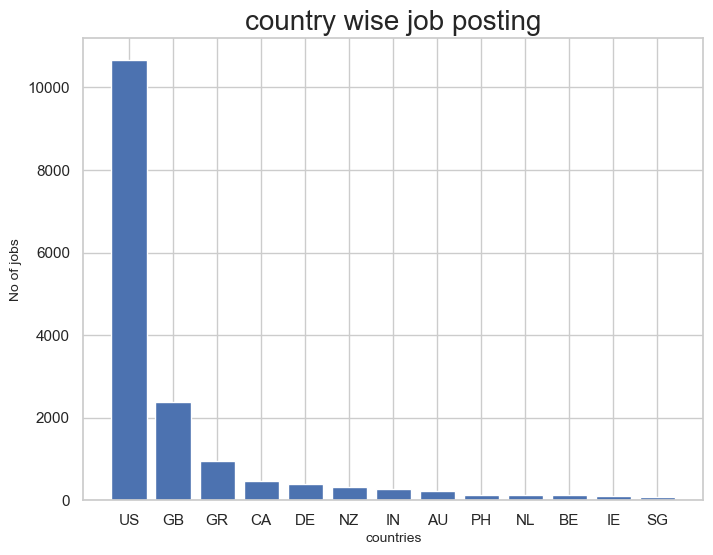

In [19]:
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
plt.bar(countr.keys(),countr.values())
plt.title("country wise job posting",size=20)
plt.xlabel("countries",size=10)
plt.ylabel("No of jobs",size=10)
plt.show()

In [20]:
edu=dict(df.required_education.value_counts()[:7])
del edu['']
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170}

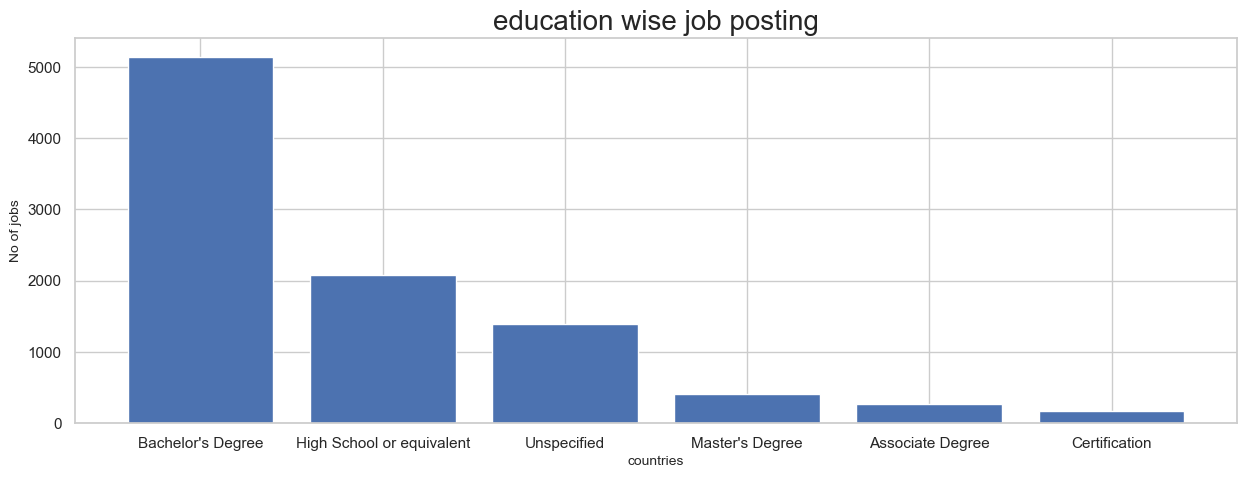

In [21]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
plt.bar(edu.keys(),edu.values())
plt.title("education wise job posting",size=20)
plt.xlabel("countries",size=10)
plt.ylabel("No of jobs",size=10)
plt.show()

In [22]:
#top 10 non fraudulent job titles
print(df[df.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [23]:
#top 10 fraudulent job titles
print(df[df.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


In [24]:
#combining req columns as text column and deleting others
df['text']=df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
del df['title']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']


In [25]:
df.head()

,job_id,location,telecommuting,has_company_logo,fraudulent,text
0,1,"US, NY, New York",0,1,0,"Marketing Intern We're Food52, and we've creat..."
1,2,"NZ, , Auckland",0,1,0,Customer Service - Cloud Video Production 90 S...
2,3,"US, IA, Wever",0,1,0,Commissioning Machinery Assistant (CMA) Valor ...
3,4,"US, DC, Washington",0,1,0,Account Executive - Washington DC Our passion ...
4,5,"US, FL, Fort Worth",0,1,0,Bill Review Manager SpotSource Solutions LLC i...


In [26]:
del df['job_id']
del df['location']
del df['telecommuting']
del df['has_company_logo']

In [27]:
df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [28]:
#storing text of fraudulent and non fruadulent jobs
fraud_jobs_text=df[df.fraudulent==1].text
realjobs_text=df[df.fraudulent==0].text

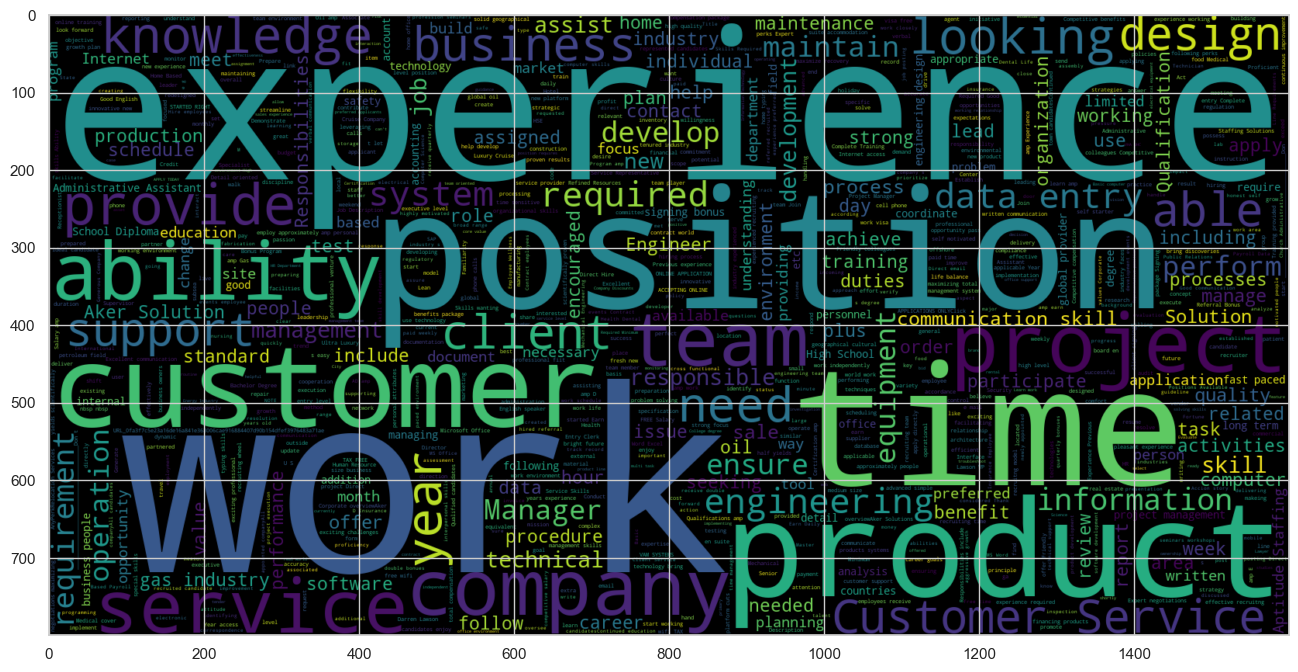

In [29]:
#word cloud of fraud jobs
Stopwords=spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc=WordCloud(min_font_size=3,max_words=3000,width=1600,height=800,stopwords=Stopwords).generate(str(" ".join(fraud_jobs_text)))
plt.imshow(wc,interpolation='bilinear')

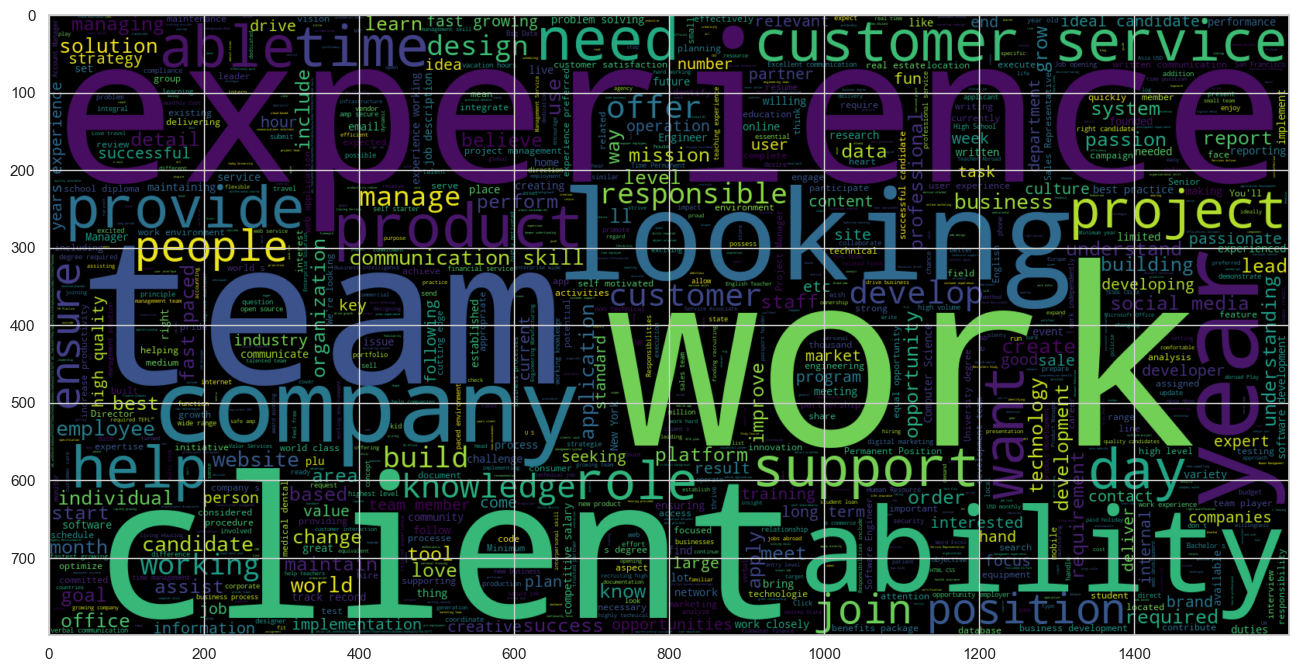

In [30]:
#word cloud of real jobs
Stopwords=spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc=WordCloud(min_font_size=3,max_words=3000,width=1600,height=800,stopwords=Stopwords).generate(str(" ".join(realjobs_text)))
plt.imshow(wc,interpolation='bilinear')

In [31]:
!pip install spacy && python -m spacy download en

     ---------------------------------------- 12.8/12.8 MB 1.1 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Preprocessing data

In [32]:
punctuation=string.punctuation#create list of punc marks
nlp=spacy.load("en_core_web_sm")
stop_words=spacy.lang.en.stop_words.STOP_WORDS#list of stop words
parser=English()
#create tokenizers
def spacy_tokenizer(sentence):
    mytokens=parser(sentence)#creating tokenizer object
    #convert mytokens into lowercase
    mytokens=[word.lemma_.lower().strip() if word.lemma_ !="-PRON-" else word.lower_ for word in mytokens ]
    #remove all stop words
    mytokens=[word for word in mytokens if word not in stop_words and word not in punctuation]
    return mytokens#return processed mytokens 

#create transform
class predictors(TransformerMixin):
    def transform(self,X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self,X, y=None, **fit_params):
        return self
    def get_params(self,deep=True):
        return{}
#cleaning text
def clean_text(text):
    return text.strip().lower()


In [33]:
df['text']=df['text'].apply(clean_text)#apply claen text

In [34]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
cv=TfidfVectorizer(max_features=100)
x=cv.fit_transform(df['text'])
df1=pd.DataFrame(x.toarray(),columns=cv.get_feature_names_out())
df.drop(["text"],axis=1,inplace=True)
main_df=pd.concat([df1,df], axis=1)

In [36]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041123,0.000000,0.042423,0.036488,0.000000,0.755236,0.000000,0.078657,0.000000,...,0.000000,0.000000,0.186067,0.051026,0.068034,0.000000,0.000000,0.000000,0.000000,0
1,0.021896,0.094190,0.035396,0.024292,0.041787,0.029771,0.490894,0.056626,0.060053,0.052431,...,0.000000,0.078004,0.165734,0.043827,0.116870,0.099327,0.000000,0.204853,0.130451,0
2,0.000000,0.000000,0.176818,0.000000,0.041749,0.089230,0.397028,0.113149,0.000000,0.000000,...,0.000000,0.062346,0.307511,0.058382,0.000000,0.000000,0.000000,0.094462,0.074476,0
3,0.023268,0.000000,0.018807,0.000000,0.000000,0.094908,0.695540,0.000000,0.031908,0.037144,...,0.023132,0.049735,0.075480,0.046573,0.000000,0.105551,0.019809,0.050236,0.059411,0
4,0.000000,0.000000,0.068013,0.000000,0.040147,0.028602,0.606377,0.081605,0.115392,0.000000,...,0.000000,0.000000,0.159229,0.028071,0.037428,0.000000,0.035818,0.030279,0.107427,0


In [37]:
y=main_df.iloc[:,-1]
X=main_df.iloc[:,:-1]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12516, 100)
(5364, 100)
(12516,)
(5364,)


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model=rfc.fit(x_train,y_train)

In [42]:
pred=rfc.predict(x_test)
score=accuracy_score(y_test,pred)
score

0.9694258016405667

In [43]:
print("Classification Report\n")
print(classification_report(y_test,pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5105
           1       1.00      0.37      0.54       259

    accuracy                           0.97      5364
   macro avg       0.98      0.68      0.76      5364
weighted avg       0.97      0.97      0.96      5364

Confusion Matrix

[[5105    0]
 [ 164   95]]
